<a href="https://colab.research.google.com/github/GZanelladev/Data-Science-Course-from-TERA/blob/main/Estudo_Observacional_Tera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# O banco de dados

O banco se refere a um experimento no qual se avaliou o FEV (volume expiratório forçado) de 654 crianças entre 3 e 19 anos. O FEV mede o volume, em litros, que uma pessoa consegue exalar em uma respiração forçada. Além do FEV, o banco contém as seguintes informações dos participantes: idade, altura, gênero e se é fumante (1 = fumante, 2 = não-fumante).

O objetivo será investigar se fumantes e não fumantes apresentam FEVs semelhantes.

[Fonte](http://www.craigmile.com/peter/teaching/673/datasets/fev_info.txt)

# Leitura do banco de dados

In [ ]:
df = pd.read_csv("http://www.craigmile.com/peter/teaching/673/datasets/fev.txt", sep='\s+')

In [ ]:
df.head(10)

,seqno,subjid,age,fev,height,sex,smoke
0,1,301,9,1.708,57.0,2,2
1,2,451,8,1.724,67.5,2,2
2,3,501,7,1.720,54.5,2,2
3,4,642,9,1.558,53.0,1,2
4,5,901,9,1.895,57.0,1,2
5,6,1701,8,2.336,61.0,2,2
6,7,1752,6,1.919,58.0,2,2
7,8,1753,6,1.415,56.0,2,2
8,9,1901,8,1.987,58.5,2,2
9,10,1951,9,1.942,60.0,2,2


In [ ]:
df.describe().round(2)

,seqno,subjid,age,fev,height,sex,smoke
count,654.00,654.00,654.00,654.00,654.00,654.00,654.0
mean,327.50,37169.57,9.93,2.64,61.14,1.49,1.9
std,188.94,23690.86,2.95,0.87,5.70,0.50,0.3
min,1.00,201.00,3.00,0.79,46.00,1.00,1.0
25%,164.25,15811.00,8.00,1.98,57.00,1.00,2.0
50%,327.50,36071.00,10.00,2.55,61.50,1.00,2.0
75%,490.75,53638.50,12.00,3.12,65.50,2.00,2.0
max,654.00,90001.00,19.00,5.79,74.00,2.00,2.0


# Estatística descritiva do FEV em fumantes

In [ ]:
df.groupby(['smoke'])['fev'].describe()

,count,mean,std,min,25%,50%,75%,max
smoke,,,,,,,,
1,65.0,3.276862,0.749986,1.694,2.795,3.169,3.751,4.872
2,589.0,2.566143,0.850522,0.791,1.920,2.465,3.048,5.793


### Boxplot

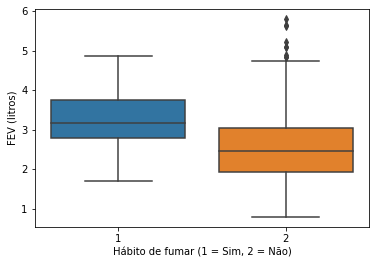

In [ ]:
sns.boxplot(x = 'smoke', y = 'fev', data = df)
plt.xlabel('Hábito de fumar (1 = Sim, 2 = Não)')
plt.ylabel('FEV (litros)')
plt.show()

# Regressão linear

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mod1 = smf.ols(formula = 'fev ~ smoke', data = df)

In [ ]:
res = mod1.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    fev   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     41.79
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           1.99e-10
Time:                        17:21:08   Log-Likelihood:                -813.88
No. Observations:                 654   AIC:                             1632.
Df Residuals:                     652   BIC:                             1641.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9876      0.212     18.851      0.0

# Mas, e a idade?

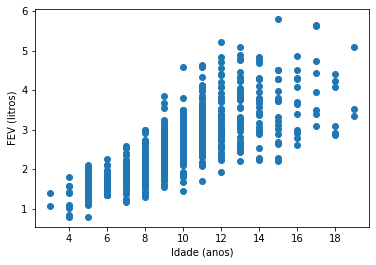

In [ ]:
plt.plot(df.age, df.fev, 'o')
plt.xlabel('Idade (anos)')
plt.ylabel('FEV (litros)')
plt.show()

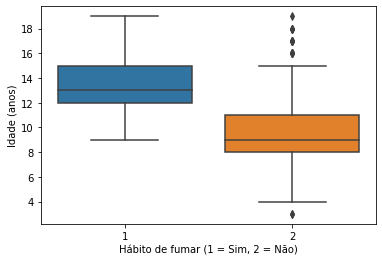

In [ ]:
sns.boxplot(x = 'smoke', y = 'age', data = df)
plt.xlabel('Hábito de fumar (1 = Sim, 2 = Não)')
plt.ylabel('Idade (anos)')
plt.show()

# Regressão linear incluindo a idade

In [ ]:
mod2 = smf.ols(formula = 'fev ~ smoke + age', data = df)

In [ ]:
res2 = mod2.fit()

In [ ]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                    fev   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     443.3
Date:                Thu, 13 Jan 2022   Prob (F-statistic):          3.25e-122
Time:                        17:21:08   Log-Likelihood:                -553.17
No. Observations:                 654   AIC:                             1112.
Df Residuals:                     651   BIC:                             1126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0506      0.202     -0.251      0.8

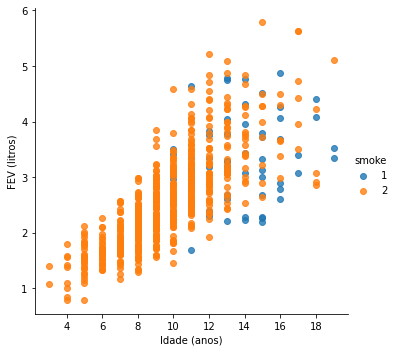

In [ ]:
sns.lmplot(x = 'age', y = 'fev', hue = 'smoke', data = df, fit_reg = False)

plt.xlabel('Idade (anos)')
plt.ylabel('FEV (litros)')
plt.show()

In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')

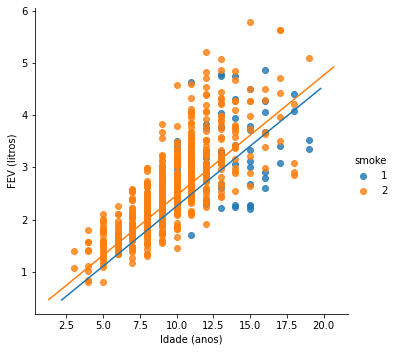

In [ ]:
sns.lmplot(x = 'age', y = 'fev', hue = 'smoke', data = df, fit_reg = False)
plt.xlabel('Idade (anos)')
plt.ylabel('FEV (litros)')
abline(0.2306, -0.0506)
abline(0.2306, 0.1584)
plt.show()